<a href="https://colab.research.google.com/github/nazmul-kaonine/UTS_ML2019_ID13300912/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 - Practical Machine Learning Project
##32513 - Machine Learning Spring 2019 
###Nazmul Kaonine - 13300912
###Omkar Dhamal - 13073921

Links:
Report:
Full Code:
CSV File (more than 25 mb so not supported in github):
https://drive.google.com/open?id=1whpphl7iN9dyKWDAG239Our_kV61YsD3


##Introduction

It is predicted that the world population will reach 9.7 billion by the end of 2050 (i.e. 30% increase to compared to current population which is 7.7 billion). It took 200,000 years for humans to reach the population of 1 billion and only one century to reach 7 Billion. This means that the food consumption will be increasing rapidly too. Moreover, the population is expected to increase in developed locations rather than regional, which implies that there will be more demand for fast food or meat-based products than regional staple food. (https://www.sciencedirect.com/science/article/pii/S0092867415003062)


More than 50 percent of daily human calories come from Rice, maize, barley etc. and to produce one kilogram of meat it takes around 10kg of feed. This indicates that there will be massive rise in food consumption. Currently the world is suffering from food crisis and the reason behind it is improper crop cultivation which leads to shortage of one crop and other ends up in surplus. This needs to be uniform depending on the consumption of every country. (https://www.kaggle.com/mariammohamed/simple-data-exploration/data)

Based on past 50 years data, crop production for the future years can be predicted using various prediction models. This in turn can help to regulate the crop production in every country depending on its consumption and can also reduce the selective food shortage.    
For the prediction of optimal crop production we have used FAO crop production data as the input. Additionally, the prediction is specific to the item (crop) produced and the element (e.g. yield) produced. To make things more specific, our model will also give crop production levels specific to the area (country). 

##Exploration

###Data Description
The data set has 49,370 rows and 64 columns without flags and 121 with flagged data for each year.
The dataset contains the following data related to food production; a detailed description of the attributes is given below.

•	Area code – Code associated with each country

•	Area – Name of the country, the dataset consists of 258 countries in total.

•	Item – Crop name 

•	Element – Area harvested, Yield and Production

•	Unit - The Area harvested is displayed in hectares (ha), Production is in tonnes i.e. 1000kg and Yield is depicted as hectograms per hectare (hg/ha).

•	Year – This column presents the total of every element in each country for each item from years 1961 to 2017

•	Flags – The flags in this column represent whether the data is official (), unofficial (*), FAO Estimate (F), calculated (Fc), aggregated (A) or not available (M). But in this analysis report we have ignored the flags and have assumed all provided values as official values.

###Data Exploration:

The dataset was uploaded to colab from the local drive. The following piece of code shows the importing process.





###We are focusing on predicting the total yield for Fruits, vegetables & cereal where fruits contain all kinds of fruits and vegetables contain all sorts of vegetables. We will be prediciting the values of 2018 & 2019.

## Initializing

In [60]:
#Importing all Libraries needed
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as p
import matplotlib
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from IPython.display import display, HTML
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

SyntaxError: ignored

In [0]:
#Changing scientific values to number
pd.options.display.float_format = '{:.2f}'.format


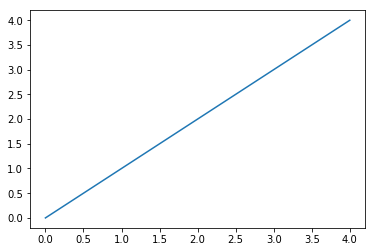

In [4]:
#Checking if matlib & numpy libraries have been called
plt.plot(np.arange(5))

## Importing the NOFLAG FOOD PRODUCTION DATASET
We are assuming that the data provided is reliable and the flags are outweighed by its existence in case of unofficial & previous year flags

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
#Importing from local drive
from google.colab import files
uploaded = files.upload()

Saving Production_Crops_E_All_Data_NOFLAG.csv to Production_Crops_E_All_Data_NOFLAG (1).csv


In [0]:
#storing in pandas dataframe in latin-1 encoding to make it readable in dataframe (not utf-8)
import io
df=pd.read_csv('Production_Crops_E_All_Data_NOFLAG (1).csv',encoding='latin-1')
# Dataset is now stored in a Pandas Dataframe

##INITIAL DATA EXPLORATION

In [0]:
#lets look at the structure of the data
df.head(5)

In [0]:
df.tail()

In [0]:
#getting count,mean standard deviation and max values of each numerical column (specially years)
df.describe()

In [0]:
#Lets check the data shape (4937 rows and64 columns)
df.shape

In [0]:
#number of countries in the data
len(df['Area'].unique())

In [0]:
# list of nonrepeated items
df['Item'].unique()

In [0]:
#number of items
len(df['Item'].unique())

In [0]:
#Number of times Items were in focus
df['Item'].value_counts()

In [0]:
#Lets draw a barplot of the three elements and see how they compare to each other
el_size = df.groupby('Element').agg('size')

In [0]:
el_size.values

In [0]:
sns.barplot(el_size.index, el_size.values)
plt.show()

In [0]:
 df.head(5)

In [0]:
#lets do the same with the items
item_size = df.groupby('Item').agg('size')

In [0]:
item_size.values

In [0]:
sns.barplot(item_size.index, item_size.values)
plt.show()

In [0]:
 df.head(5)

This is by no means clear. So lets do some data preprocessing.

NOTE: Lets not get carried away. 
Permanent crop yield data are not as reliable as temporary crops. 
Unreliable data: grapes
cocoa, coffee
Our items in focus are:
Cereals, Vegetables, total (including melons), Fruit, total (excluding melons),Bananas and plantains, Treenuts

##DATA PREPROCESSING

Lets clear up the missing values

In [0]:
#Lets check out the missing values
df.isna().sum()

In [0]:
df=df.dropna()

In [39]:
df.shape

(29876, 65)

Lets make another column which is the aggregate of all amounts from every year and lets look at what the biggest item that has been produced.

In [0]:
#Lets see the total elements of each item from 1961 to 2017
df['Sum Years'] = 0
for year in range(1961, 2017):
    col = 'Y' + str(year)
    df['Sum Years'] = df['Sum Years'] + df[col]

In [41]:
df.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Sum Years
6,2,Afghanistan,515,Apples,5312,Area harvested,ha,2220.00,2220.00,2220.00,2350.00,2480.00,2740.00,3060.00,2990.00,3040.00,3060.00,3060.00,3150.00,3210.00,3270.00,3270.00,3270.00,3280.00,3250.00,3150.00,3150.00,3080.00,2960.00,2850.00,2730.00,2660.00,2590.00,2230.00,2330.00,2340.00,2365.00,2346.00,2308.00,2300.00,2350.00,2631.00,3135.00,3748.00,4410.00,4930.00,5598.00,5482.00,5045.00,3935.00,2311.00,2751.00,7000.00,7000.00,7000.00,8550.00,8550.00,8863.00,9148.00,10341.00,12247.00,13038.00,19365.00,26847.00,248957.00
7,2,Afghanistan,515,Apples,5419,Yield,hg/ha,68018.00,68018.00,68018.00,78298.00,82258.00,83212.00,90196.00,93311.00,92763.00,89216.00,70261.00,84444.00,85981.00,85015.00,85321.00,80122.00,47256.00,69846.00,68571.00,70794.00,71753.00,72297.00,72982.00,73260.00,71805.00,74903.00,74439.00,72532.00,72222.00,71319.00,74636.00,74516.00,73913.00,74468.00,74766.00,74452.00,73982.00,73433.00,72883.00,72415.00,72135.00,70620.00,71266.00,72228.00,73571.00,75000.00,85000.00,80087.00,85105.00,70000.00,70000.00,76519.00,76005.00,73000.00,68824.00,72762.00,65184.00,4220017.00
8,2,Afghanistan,515,Apples,5510,Production,tonnes,15100.00,15100.00,15100.00,18400.00,20400.00,22800.00,27600.00,27900.00,28200.00,27300.00,21500.00,26600.00,27600.00,27800.00,27900.00,26200.00,15500.00,22700.00,21600.00,22300.00,22100.00,21400.00,20800.00,20000.00,19100.00,19400.00,16600.00,16900.00,16900.00,16867.00,17507.00,17200.00,17000.00,17500.00,19669.00,23341.00,27727.00,32386.00,35928.00,40540.00,39542.00,35630.00,28043.00,16692.00,20239.00,52500.00,59500.00,56061.00,72765.00,59850.00,62041.00,70000.00,78597.00,89403.00,89733.00,140903.00,175000.00,1867964.00
9,2,Afghanistan,526,Apricots,5312,Area harvested,ha,4820.00,4820.00,4820.00,5100.00,5370.00,5930.00,6620.00,6480.00,6590.00,6630.00,6630.00,6810.00,6950.00,7070.00,7080.00,7080.00,7100.00,7050.00,6810.00,6820.00,6680.00,6410.00,6170.00,5920.00,5750.00,5610.00,4830.00,5050.00,5060.00,5115.00,4876.00,4951.00,5100.00,5119.00,5150.00,5325.00,5407.00,5505.00,5612.00,5754.00,5200.00,6272.00,7007.00,5200.00,7223.00,8030.00,8000.00,8000.00,8170.00,8320.00,8320.00,8350.00,9005.00,9005.00,9116.00,8595.00,23890.00,359787.00
10,2,Afghanistan,526,Apricots,5419,Yield,hg/ha,66390.00,66390.00,66390.00,76863.00,80819.00,81619.00,88671.00,91667.00,91047.00,87632.00,68929.00,82966.00,84604.00,83734.00,84040.00,78672.00,46620.00,68511.00,67548.00,69648.00,70509.00,70827.00,71799.00,71791.00,70783.00,73619.00,73085.00,71089.00,71344.00,70440.00,75278.00,74131.00,72549.00,73576.00,72816.00,73934.00,74217.00,74465.00,74589.00,74451.00,73077.00,72960.00,71773.00,70846.00,68705.00,62267.00,72500.00,74448.00,73439.00,80000.00,81725.00,100000.00,99944.00,99944.00,96189.00,20819.00,55175.00,4206688.00


In [0]:
#Transforming all year columns to a single column
df1= pd.melt(df, id_vars=["Area Code","Area","Item Code","Item","Element Code", "Element", "Unit", "Sum Years"], 
...         var_name="Year", value_name="Amount")

In [0]:
df1.tail(5)

This is where we put the yield, harvest & production elements from Elements column into columns of their own with 0 or 1 values. (Good for data modelling)

In [0]:
element=df1.pop('Element')

In [0]:
df1['Area harvested']=(element=='Area harvested')*1.0
df1['Production']=(element=='Production')*1.0
df1['Yield']=(element=='Yield')*1.0

In [0]:
df1.head(5)

In [0]:
# lets remove the extra Y from the Year column
df1['Year'] = df1['Year'].map(lambda x: x.lstrip('Y').rstrip('aAbBcC'))

The amount data has been checked for outliers.

In [0]:
#now, lets normalize the big values such as Sum Years to ensure equal contribution to our model
cols_to_norm = ['Sum Years']
df1[cols_to_norm] = df1[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [30]:
df1.tail(5)

,Area Code,Area,Item Code,Item,Element Code,Unit,Sum Years,Year,Amount,Area harvested,Production,Yield
2814085,5817,Net Food Importing Developing Countries,1729,"Treenuts,Total",5419,hg/ha,313337.00,2017,5302.00,0.00,0.00,1.00
2814086,5817,Net Food Importing Developing Countries,1729,"Treenuts,Total",5510,tonnes,38754526.00,2017,2096073.00,0.00,1.00,0.00
2814087,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5312,ha,213582057.00,2017,7078542.00,1.00,0.00,0.00
2814088,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5419,hg/ha,5247352.00,2017,116543.00,0.00,0.00,1.00
2814089,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,tonnes,2140430193.00,2017,82495501.00,0.00,1.00,0.00


In [0]:
#lets find out the mean values of each item by year
df1['mean']=df1.groupby(['Item Code','Year','Area'])['Amount'].transform('mean')


In [0]:
#Creating the Final Y column which denotes if amount is optimal or not.
#Amount is optimal if its greater than mean.
df1['Y'] = np.where(df1['Amount']>=df1['mean'], '1', '0')


In [37]:
#Now that we have the Optimal values, we predict if the amount is going to be optimal for the unknown
df1.head(5)

,Area Code,Area,Item Code,Item,Element Code,Unit,Sum Years,Year,Amount,Area harvested,Production,Yield,mean,Y
0,2,Afghanistan,515,Apples,5312,ha,0.00,1961,2220.00,1.00,0.00,0.00,28446.00,0
1,2,Afghanistan,515,Apples,5419,hg/ha,0.00,1961,68018.00,0.00,0.00,1.00,28446.00,1
2,2,Afghanistan,515,Apples,5510,tonnes,0.00,1961,15100.00,0.00,1.00,0.00,28446.00,0
3,2,Afghanistan,526,Apricots,5312,ha,0.00,1961,4820.00,1.00,0.00,0.00,34403.33,0
4,2,Afghanistan,526,Apricots,5419,hg/ha,0.00,1961,66390.00,0.00,0.00,1.00,34403.33,1


##DATA MODELING

KeyboardInterrupt: ignored

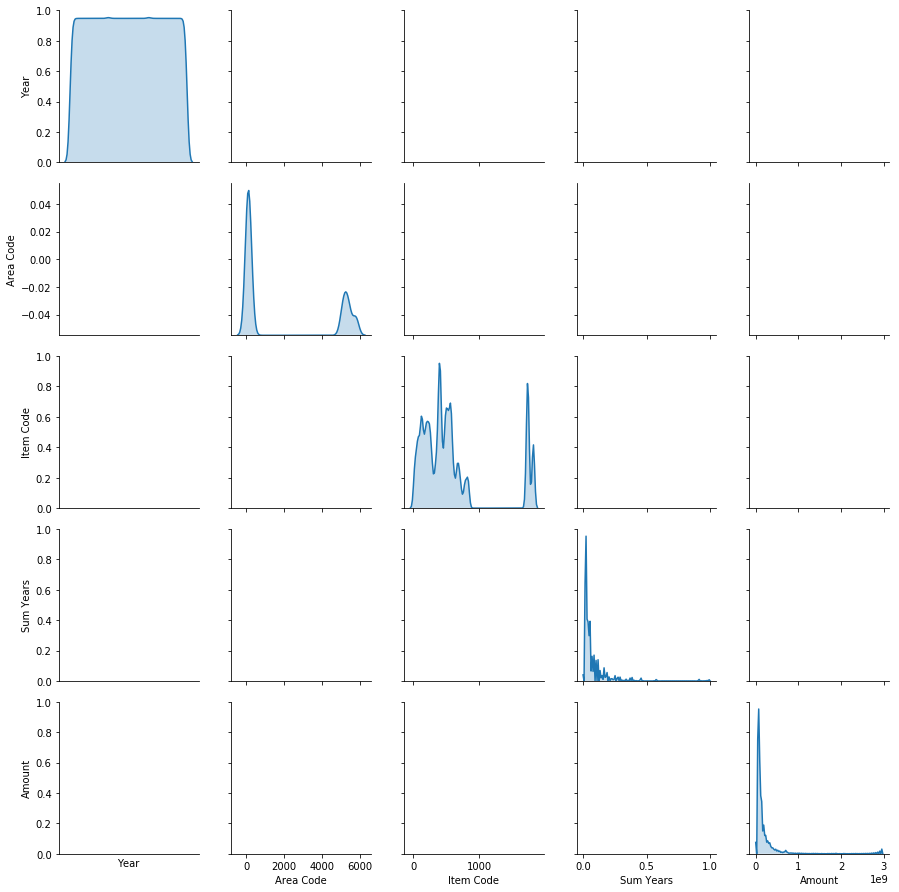

In [15]:
#lets try a predictive model one but first lets inspect the data
sns.pairplot(df1[["Year","Area Code","Item Code","Sum Years","Amount"]], diag_kind="kde")
plt.show()

##NEURAL NETWORK

In [0]:
y = df1['Y']
X = df1.drop(['Y','Area','Item','Unit'], axis = 1)
# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=0)

In [0]:
NN_model = Sequential()
NN_model.add(Dense(128, input_dim = 11, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
checkpoint_name = 'Weights-{epoch:03d}-{val_acc:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_acc', verbose = 1, save_best_only = True, mode ='max')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(train_X, train_y, epochs=150, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

In [0]:
wights_file = './Weights-001-0.84775.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##KNN

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702932 entries, 0 to 1702931
Data columns (total 14 columns):
Area Code         int64
Area              object
Item Code         int64
Item              object
Element Code      int64
Unit              object
Sum Years         float64
Year              object
Amount            float64
Area harvested    float64
Production        float64
Yield             float64
mean              float64
Y                 object
dtypes: float64(6), int64(3), object(5)
memory usage: 181.9+ MB


In [0]:
X=df1[['Area Code','Item Code','Sum Years','Element Code','Amount']]
Y=df1['Y']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [0]:
knn=KNeighborsClassifier()

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425733 entries, 1368569 to 1128136
Data columns (total 2 columns):
Sum Years    425733 non-null float64
Amount       425733 non-null float64
dtypes: float64(2)
memory usage: 9.7 MB


In [55]:
knn.score(X_test,y_test)

0.7155635104631306

In [56]:
confusion_matrix(X_test, y_test)

ValueError: ignored

In [57]:
print(classification_report(X_test, y_test))

TypeError: ignored

##Accuracy is 94.22% for KNN

##Decision Tree Classifier

In [0]:
features = ['Year','Area Code','Item Code','Sum Years','Element Code'] 

In [0]:
X = df1[features].copy()
y = df1['Y'].copy()

In [0]:
X = pd.get_dummies(X)

In [0]:
first_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X = pd.DataFrame(first_imputer.fit_transform(X))

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1,test_size=0.30)

In [65]:
def AccuracyTracker(Xtrain,Xtest,ytrain,ytest,n):
    model = DecisionTreeClassifier(max_leaf_nodes=n,random_state=1)
    model.fit(Xtrain,ytrain)
    print(n,accuracy_score(ytest,model.predict(Xtest)))
    predictionDTC=model.predict(Xtest)
for i in range(2,20):
    AccuracyTracker(Xtrain,Xtest,ytrain,ytest,i)

2 0.8650700751644221
3 0.8998101315377388
4 0.8998101315377388


KeyboardInterrupt: ignored

In [68]:

print(classification_report(ytest,Xtest))

ValueError: ignored

Accuracy is maximum 91.9 for n=17

##Using the same upper values the Random Forest Classifier gives an accuracy of 96.18%

In [65]:
model = RandomForestClassifier(n_estimators=30)
model.fit(Xtrain,ytrain)
accuracy_score(ytest,model.predict(Xtest))

0.9618579705606013

NameError: ignored